[[6.13533505]
 [6.52424572]
 [6.15921518]
 [7.19224761]
 [5.43399993]
 [6.28811004]]


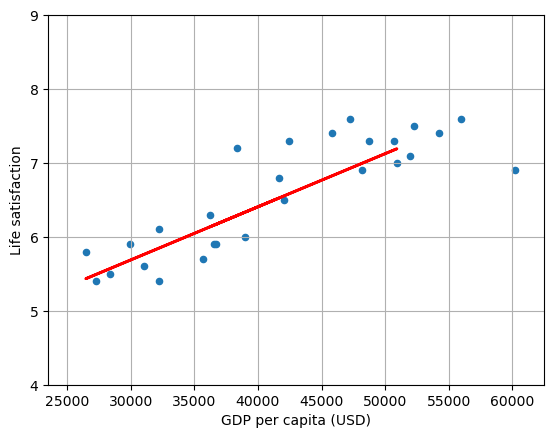

MAE: 0.36
MSE: 0.20
RMSE: 0.44
R-squared: 0.32


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
# import the function for data split
from sklearn.model_selection import train_test_split
# import the model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")

X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])

# split the data sameples to train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(y_pred)

plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction line')
plt.show()

# Calculate MAE, MSE, RMSE and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


27


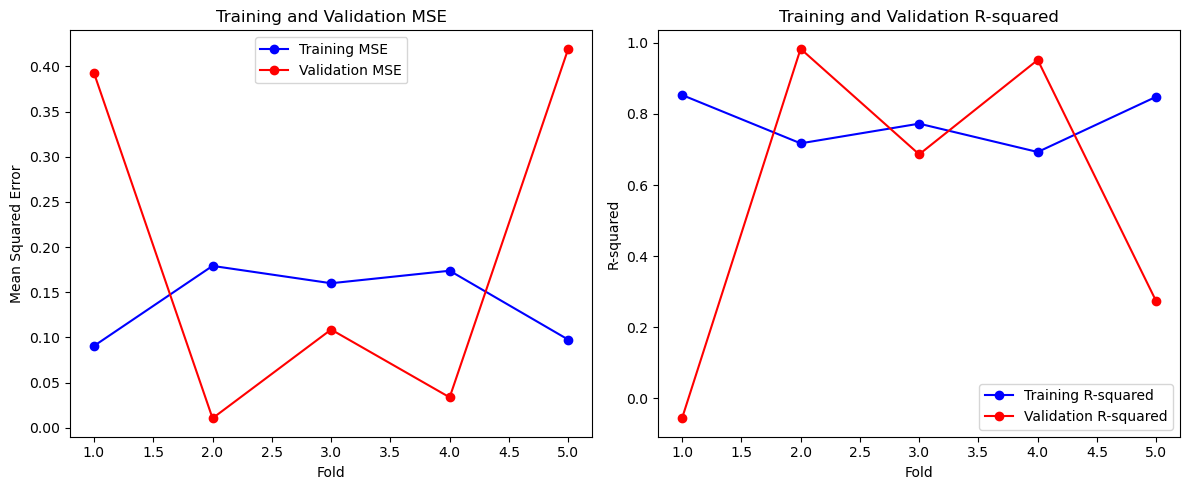

Test MSE: 0.1955
Test R-squared: 0.3181


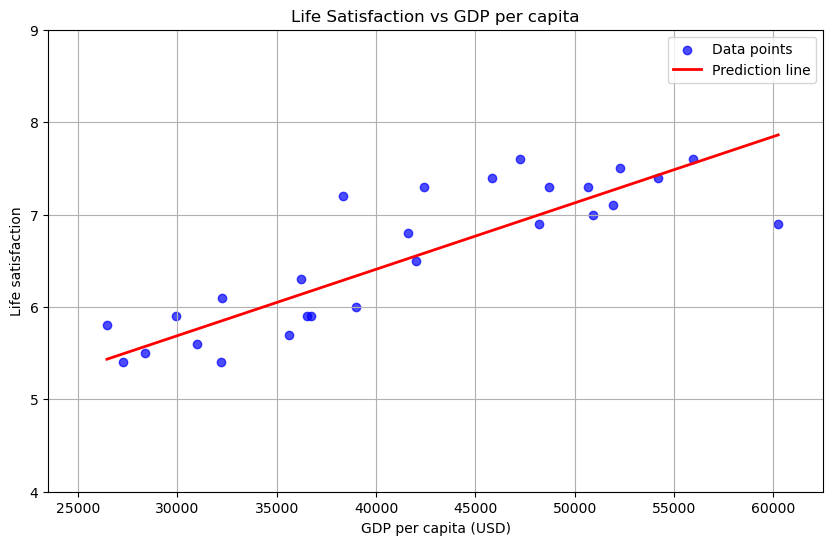

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score

# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")

print(lifesat.shape[0])

X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare for k-fold cross-validation
k_folds = 9
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store results
train_mse = []
val_mse = []
train_r2 = []
val_r2 = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train), 1):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)
    
    y_train_pred = model.predict(X_train_fold)
    y_val_pred = model.predict(X_val_fold)
    
    train_mse.append(mean_squared_error(y_train_fold, y_train_pred))
    val_mse.append(mean_squared_error(y_val_fold, y_val_pred))
    train_r2.append(r2_score(y_train_fold, y_train_pred))
    val_r2.append(r2_score(y_val_fold, y_val_pred))

# Plot training and validation loss (MSE)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, k_folds + 1), train_mse, 'bo-', label='Training MSE')
plt.plot(range(1, k_folds + 1), val_mse, 'ro-', label='Validation MSE')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation MSE')
plt.legend()

# Plot training and validation accuracy (R-squared)
plt.subplot(1, 2, 2)
plt.plot(range(1, k_folds + 1), train_r2, 'bo-', label='Training R-squared')
plt.plot(range(1, k_folds + 1), val_r2, 'ro-', label='Validation R-squared')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Training and Validation R-squared')
plt.legend()

plt.tight_layout()
plt.show()

# Train final model on entire training set
final_model = LinearRegression()
final_model.fit(X_train, y_train)

# Make predictions on test set
y_pred = final_model.predict(X_test)

# Calculate final metrics
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {test_mse:.4f}")
print(f"Test R-squared: {test_r2:.4f}")

# Visualize the data and prediction line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data points')
plt.plot(X, final_model.predict(X), color='red', linewidth=2, label='Prediction line')
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("Life Satisfaction vs GDP per capita")
plt.axis([23_500, 62_500, 4, 9])
plt.legend()
plt.grid(True)
plt.show()